In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

#libraries for data visualisation 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly_express as px

#set visualisation
%matplotlib inline
sns.set_style("whitegrid")

/kaggle/input/my-reading-log/reading log  rev 2.csv


In [2]:
df = pd.read_csv("/kaggle/input/my-reading-log/reading log  rev 2.csv")

In [3]:
df.head()

,completion date,Title,author(s),pages,review,rating,status,format,platform,publisher,Imprint,publication date,type,genre,language
0,04-06-21,The Bookish Life of Nina Hill,Abbi Waxman,352,y,5.0,Completed,Audiobook,Libby,Hachette Book,Headline Review,9-Jul-2019,Fiction,Realist Literature,eng
1,02-19-20,Twas The Nightshift Before Christmas,Adam Kay,160,y,4.0,Completed,Physical Book,NaN,Macmillan Publishers,Picador,13-Oct-2022,Nonfiction,Humour/ Satire,eng
2,09-19-18,This is Going to Hurt: Secret Diaries of a Jun...,Adam Kay,304,y,5.0,Completed,Physical Book,NaN,Macmillan Publishers,Picador,3-Feb-2022,Nonfiction,Humour/ Satire,eng
3,10-11-20,Poirot Investigates,Agatha Christie,224,y,1.5,Completed,Physical Book,NaN,HarperCollins,HarperCollins,24-Mar-2016,Fiction,Mystery,eng
4,10-10-20,Peril at End House,Agatha Christie,252,y,3.0,Completed,Physical Book,NaN,HarperCollins,HarperCollins,24-Sep-2015,Fiction,Mystery,eng


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 391 entries, 0 to 390
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   completion date   329 non-null    object 
 1   Title             391 non-null    object 
 2   author(s)         391 non-null    object 
 3   pages             391 non-null    int64  
 4   review            384 non-null    object 
 5   rating            345 non-null    float64
 6   status            391 non-null    object 
 7   format            391 non-null    object 
 8   platform          100 non-null    object 
 9   publisher         391 non-null    object 
 10  Imprint           391 non-null    object 
 11  publication date  391 non-null    object 
 12  type              391 non-null    object 
 13  genre             391 non-null    object 
 14  language          391 non-null    object 
dtypes: float64(1), int64(1), object(13)
memory usage: 45.9+ KB


In [5]:
df.describe()

,pages,rating
count,391.000000,345.000000
mean,335.317136,3.576087
std,131.370651,1.057147
min,31.000000,1.000000
25%,256.000000,3.000000
50%,320.000000,4.000000
75%,384.500000,4.000000
max,912.000000,5.000000


# completion date

In [6]:
df['completion date'] = pd.to_datetime(df['completion date'])

In [7]:
px.bar( df, x= "completion date", y = "pages")

In [8]:
df['Completion_year'] = df['completion date'].dt.year
df['Completion_month'] = df['completion date'].dt.month

In [9]:
px.bar( df, x= "Completion_year", y = "pages")

In [10]:
px.bar( df, x= "Completion_month", y = "pages")

# Title

In [11]:
rereads = df["Title"].value_counts().rename_axis ("titles").reset_index(name = "reads")
rereads[rereads["reads"]>1]

,titles,reads
0,Magpie Murders,2
1,陽気なギャングが地球を回す,2
2,世界から猫が消えたなら,2
3,ぼくは明日、昨日のきみとデートする,2
4,GIVER 復讐の贈与者,2
5,妖怪アパートの幽雅な日常 1,2
6,The Subtle Art of Not Giving a F*ck,2
7,The Alchemist,2
8,Freakonomics,2
9,Vicious,2


# author(s)

In [12]:
read_books = df.dropna(subset = ["completion date"])
read_books = read_books.sort_values(by = "completion date")

df_no_duplicates = df.drop_duplicates(subset = "completion date", keep = "first")

In [13]:
fav_authors = df_no_duplicates["author(s)"].value_counts().rename_axis ("author(s)").reset_index(name = "books/reads")
fav_authors[fav_authors["books/reads"]>1].head()

,author(s),books/reads
0,東野 圭吾,15
1,谷 瑞恵,13
2,香月 日輪,9
3,伊坂 幸太郎,6
4,池井戸 潤,5


In [14]:
px.bar(fav_authors[fav_authors["books/reads"]>2], x="author(s)", y = "books/reads" )

# pages

In [15]:
px.histogram(df, x = "pages", nbins=20)

<AxesSubplot:xlabel='review', ylabel='count'>

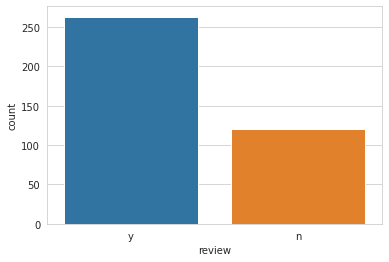

In [16]:
sns.countplot(x = "review", data = df)

In [17]:
print(round((df[df["review"]=="y"].shape[0]/df.dropna(subset = ["review"]).shape[0])*100, 1) ,"% of books read have been reviewed")

68.5 % of books read have been reviewed


In [18]:
px.histogram(df, x = "rating", nbins=5)

<AxesSubplot:xlabel='status', ylabel='count'>

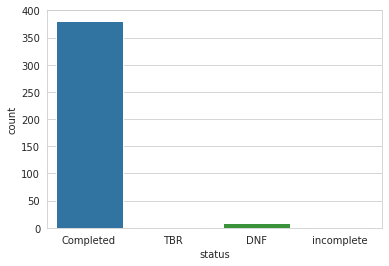

In [19]:
sns.countplot(x = "status", data = df)

<AxesSubplot:xlabel='format', ylabel='count'>

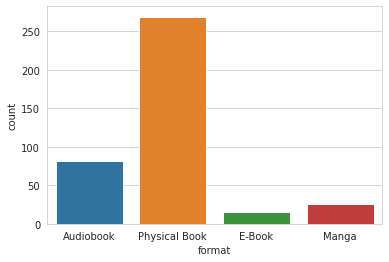

In [20]:
sns.countplot(x = "format", data = df)

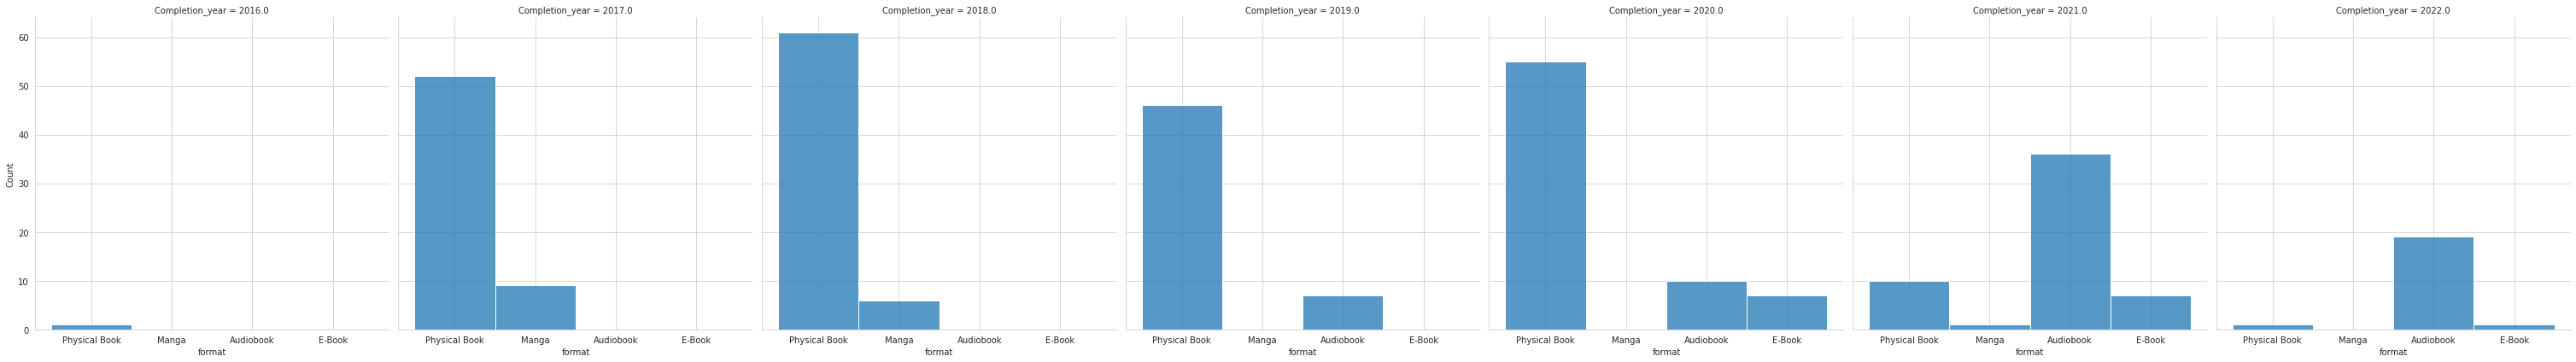

In [21]:
g = sns.FacetGrid(df, col='Completion_year', height=6)
g.map(sns.histplot, "format")
plt.show()

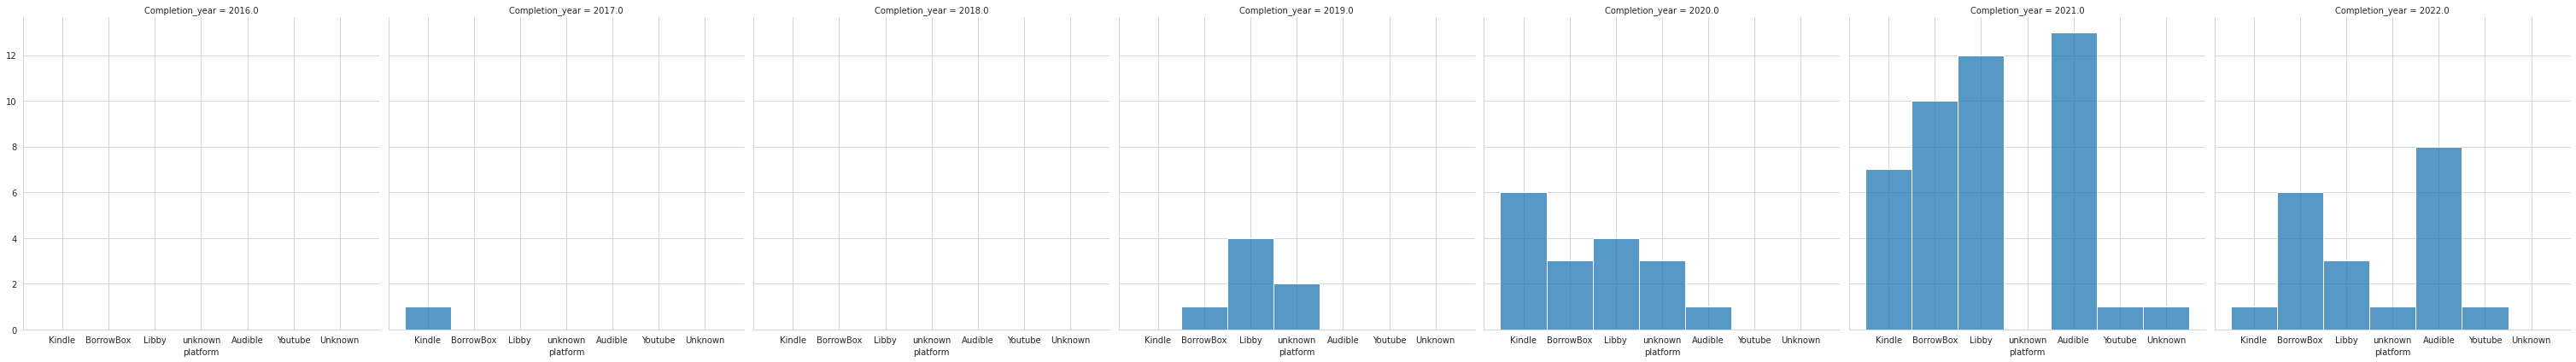

In [22]:
g = sns.FacetGrid(df, col='Completion_year', height=6)
g.map(sns.histplot, "platform")
plt.show()

In [23]:
publisher = df_no_duplicates["publisher"].value_counts().rename_axis ("publisher").reset_index(name = "books/reads")
publisher[publisher["books/reads"]>1].head(10)

,publisher,books/reads
0,KADOKAWA,52
1,Penguin,24
2,集英社,22
3,講談社,22
4,Penguin Random House,20
5,HarperCollins,17
6,Macmillan Publishers,17
7,Orion,13
8,文藝春秋,12
9,penguin,11


In [24]:
Imprint = df_no_duplicates["Imprint"].value_counts().rename_axis ("Imprint").reset_index(name = "books/reads")
Imprint[Imprint["books/reads"]>1].head(10)

,Imprint,books/reads
0,角川文庫,22
1,講談社文庫,19
2,コバルト文庫,14
3,Penguin Classics,13
4,Penguin,13
5,文春文庫,12
6,メディアワークス文庫,11
7,Picador,10
8,角川ホラー文庫,8
9,HarperCollins,7


In [25]:
df['publication date'] = pd.to_datetime(df['publication date'])

In [26]:
df['publication_year'] = df['publication date'].dt.year
df['publication_month'] = df['publication date'].dt.month

In [27]:
px.histogram(df, x = "publication_year", nbins=5)

<AxesSubplot:xlabel='type', ylabel='count'>

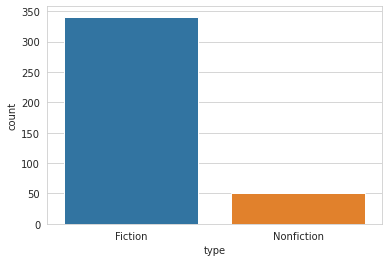

In [28]:
sns.countplot(x = "type", data = df)

<AxesSubplot:xlabel='language', ylabel='count'>

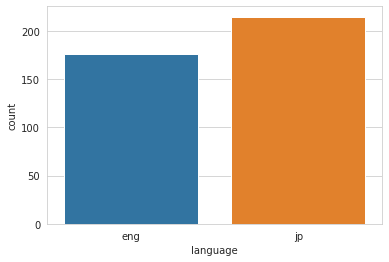

In [29]:
sns.countplot(x = "language", data = df)

In [30]:
px.histogram(df, x = "genre", color = "language")

<AxesSubplot:>

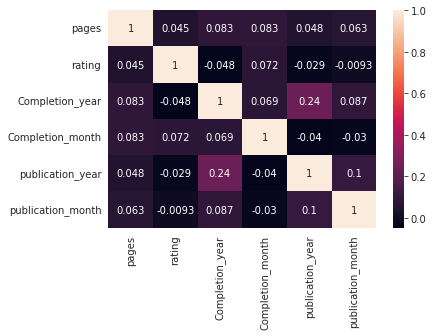

In [31]:
sns.heatmap(df.corr(), annot=True)

In [32]:
from sklearn.preprocessing import LabelEncoder

In [33]:
df.columns

Index(['completion date', 'Title', 'author(s)', 'pages', 'review', 'rating',
       'status', 'format', 'platform', 'publisher', 'Imprint',
       'publication date', 'type', 'genre', 'language', 'Completion_year',
       'Completion_month', 'publication_year', 'publication_month'],
      dtype='object')

In [34]:
le = LabelEncoder()
df["author_code"] = le.fit_transform(df["author(s)"])
df["format_code"] = le.fit_transform(df["format"])
df["platform_code"] = le.fit_transform(df["platform"])
df["publisher_code"] = le.fit_transform(df["publisher"])
df["Imprint_code"] = le.fit_transform(df["Imprint"])

df["type_code"] = le.fit_transform(df["type"])
df["genre_code"] = le.fit_transform(df["genre"])
df["language_code"] = le.fit_transform(df["language"])

<AxesSubplot:>

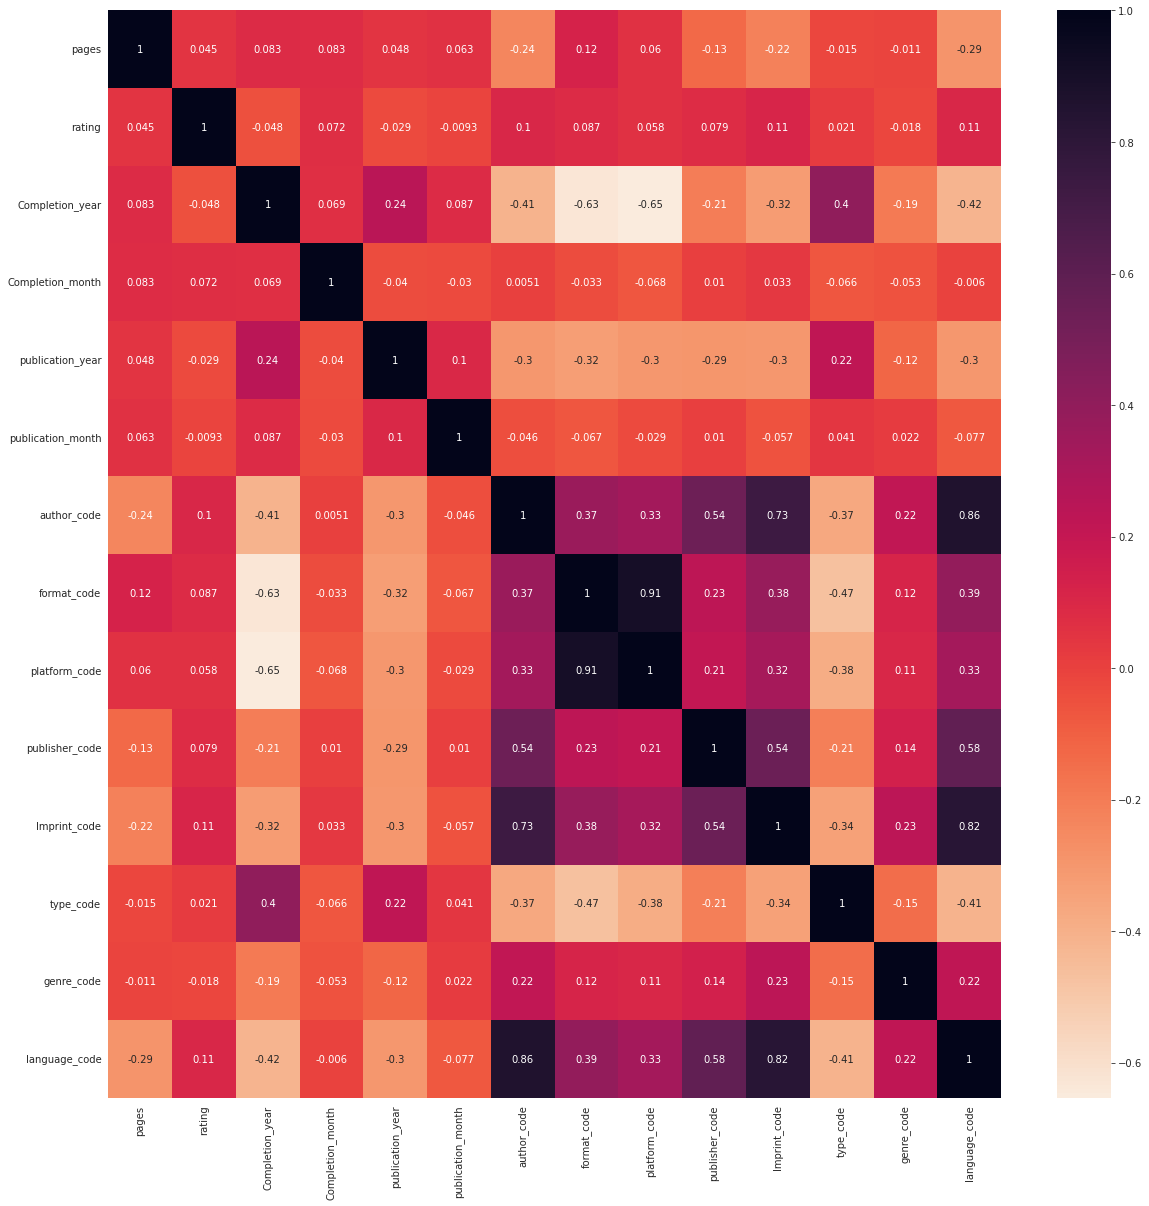

In [35]:
plt.figure(figsize = (20,20))
sns.heatmap(df.corr(), annot=True, cmap = "rocket_r")